<a href="https://colab.research.google.com/github/eunjaelim/notefindProject/blob/master/EMNIST_PRJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# emnist - 숫자

# 데이터 로드 / 전처리

In [1]:
import pandas as pd
import numpy as np
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam







In [2]:
# CSV 파일 로드
train_df = pd.read_csv("emnist-digits-train.csv", header=None)
test_df = pd.read_csv("emnist-digits-test.csv", header=None)


In [3]:
test_df

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39996,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39997,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39998,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
print(train_df.shape)

(240000, 785)


In [5]:
print(test_df.shape)

(40000, 785)


In [6]:
print(train_df.head())

   0    1    2    3    4    5    6    7    8    9    ...  775  776  777  778  \
0    8    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
1    9    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
2    6    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
3    3    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
4    6    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   

   779  780  781  782  783  784  
0    0    0    0    0    0    0  
1    0    0    0    0    0    0  
2    0    0    0    0    0    0  
3    0    0    0    0    0    0  
4    0    0    0    0    0    0  

[5 rows x 785 columns]


In [7]:
print(test_df.head())

   0    1    2    3    4    5    6    7    8    9    ...  775  776  777  778  \
0    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
1    9    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
2    7    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
3    9    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
4    2    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   

   779  780  781  782  783  784  
0    0    0    0    0    0    0  
1    0    0    0    0    0    0  
2    0    0    0    0    0    0  
3    0    0    0    0    0    0  
4    0    0    0    0    0    0  

[5 rows x 785 columns]


In [8]:
# 첫 번째 열은 라벨, 나머지 열은 이미지 픽셀 데이터
X_train = train_df.iloc[:, 1:].values
y_train = train_df.iloc[:, 0].values
X_test = test_df.iloc[:, 1:].values
y_test = test_df.iloc[:, 0].values

In [9]:
# 결측값 확인
print(train_df.isnull().sum())
print(test_df.isnull().sum())

0      0
1      0
2      0
3      0
4      0
      ..
780    0
781    0
782    0
783    0
784    0
Length: 785, dtype: int64
0      0
1      0
2      0
3      0
4      0
      ..
780    0
781    0
782    0
783    0
784    0
Length: 785, dtype: int64


In [10]:
# 훈련 데이터의 첫 번째 열은 라벨, 나머지는 이미지 데이터
X_train = train_df.iloc[:, 1:].values  # 이미지 데이터
y_train = train_df.iloc[:, 0].values   # 라벨

# 테스트 데이터도 동일하게 분리
X_test = test_df.iloc[:, 1:].values
y_test = test_df.iloc[:, 0].values

In [11]:
# 0~255 사이의 픽셀 값을 0~1 사이로 정규화
X_train = X_train / 255.0
X_test = X_test / 255.0

In [12]:
# CNN을 위한 이미지 형태로 변경 (28x28 크기의 이미지로 재구성, 흑백 채널 추가)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [13]:
# y_train, y_test가 원래 라벨인지 확인 후, 필요 시 원핫 인코딩
if len(y_train.shape) > 2:  # 3차원 라벨일 경우 차원 축소
    y_train = y_train.argmax(axis=-1)
    y_test = y_test.argmax(axis=-1)

In [14]:
print("y_train final shape:", y_train.shape)  # (샘플 수, 10)
print("y_test final shape:", y_test.shape)

y_train final shape: (240000,)
y_test final shape: (40000,)


In [15]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [16]:
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

y_train shape: (240000, 10)
y_test shape: (40000, 10)


# CNN




### CNN 모델 설계

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

# 모델 구조
model = Sequential()

# 첫 번째 Conv2D 층
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 두 번째 Conv2D 층
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 세 번째 Conv2D 층
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten 및 Dense 층 추가
model.add(Flatten())
model.add(Dense(275, activation='relu'))
model.add(Dense(128, activation='relu'))

# 출력층 (10개의 클래스)
model.add(Dense(10, activation='softmax'))  # digit 데이터는 10개의 클래스

# 학습률을 0.001로 설정한 Adam 옵티마이저
optimizer = Adam(learning_rate=0.003)

# 모델 컴파일
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 모델 요약 출력
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 11, 11, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 5, 5, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 3, 3, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 1, 1, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 275)                 │          70,675 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 128)                 │          35,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 476,957 (1.82 MB)

 Trainable params: 476,957 (1.82 MB)

 Non-trainable params: 0 (0.00 B)

### 모델 컴파일

# 모델 학습

In [23]:
# 모델 학습
# 모델 학습
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=10,  # 학습할 epoch 수 (조정 가능)
                    batch_size=200)  # 한 번에 처리할 배


Epoch 1/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 0s 605ms/step - accuracy: 0.9208 - loss: 0.2391

KeyboardInterrupt: 

In [24]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (240000, 28, 28, 1)
y_train shape: (240000, 10)
X_test shape: (40000, 28, 28, 1)
y_test shape: (40000, 10)


### 모델 평가

In [25]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"테스트 정확도: {test_acc}")

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 33s 26ms/step - accuracy: 0.9891 - loss: 0.0367
테스트 정확도: 0.9891250133514404


### 모델 예측

In [26]:
# 새로운 데이터로 예측
predictions = model.predict(X_test[:5])

# 첫 번째 테스트 데이터 예측 결과 확인
print("예측 결과:", predictions.argmax(axis=1))
print("실제 라벨:", y_test[:5].argmax(axis=1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
예측 결과: [0 9 7 9 2]
실제 라벨: [0 9 7 9 2]


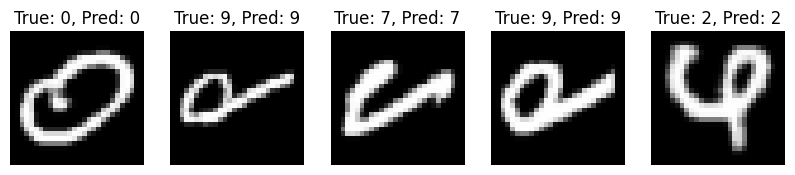

In [32]:
import matplotlib.pyplot as plt

# 예측 결과 시각화 함수
def visualize_predictions(images, true_labels, predicted_labels, num_samples=5):
    plt.figure(figsize=(10, 5))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(images[i].reshape(28, 28), cmap='gray')  # 28x28 크기의 흑백 이미지
        plt.title(f"True: {true_labels[i].argmax()}, Pred: {predicted_labels[i].argmax()}")
        plt.axis('off')  # 축 제거
    plt.show()

# 예측한 라벨 중 상위 5개 이미지와 라벨을 시각화
visualize_predictions(X_test, y_test, predictions, num_samples=5)

In [34]:
model.save('my_digit_model.h5')

print("모델이 'my_digit_model.h5' 파일로 저장되었습니다.")

모델이 'my_digit_model.h5' 파일로 저장되었습니다.


#mnist - 문자

### 저장된 모델 파일 불러와서 확인

In [40]:
import numpy as np
from tensorflow.keras.models import load_model

In [41]:
# 모델 로드
model = load_model('my_digit_model.h5')

In [42]:
img = Image.open('digit_image3.PNG').convert('L')  # 이미지를 흑백으로 변환
img = img.resize((28, 28))  # 모델 입력 크기에 맞게 리사이즈
input_image = np.array(img).reshape(1, 28, 28, 1).astype('float32') / 255.0  # 정규화 및 모델 입력 형식으로 변환

In [43]:
prediction = model.predict(input_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


In [44]:
# 예측 결과 출력
print(f"모델 예측 결과: {prediction}")
print(f"예측된 클래스: {np.argmax(prediction)}")

모델 예측 결과: [[0.5845161  0.00662156 0.06764197 0.00605253 0.14637029 0.00154482
  0.01882511 0.0051288  0.12512594 0.03817295]]
예측된 클래스: 0


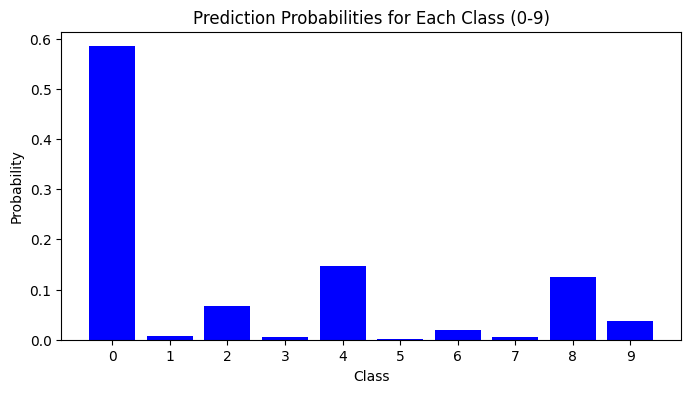

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from PIL import Image
plt.figure(figsize=(8, 4))
plt.bar(range(10), prediction[0], color='blue')  # 예측된 확률 값 시각화 (0~9 클래스)
plt.title('Prediction Probabilities for Each Class (0-9)')
plt.xlabel('Class')
plt.ylabel('Probability')
plt.xticks(range(10))  # x축에 0-9 클래스 표시
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
이미지 1의 모델 예측 결과: [[0.01415919 0.83408177 0.04274176 0.02075188 0.00485884 0.01347034
  0.02581527 0.02277354 0.01343572 0.00791176]]
이미지 1의 예측된 클래스: 1


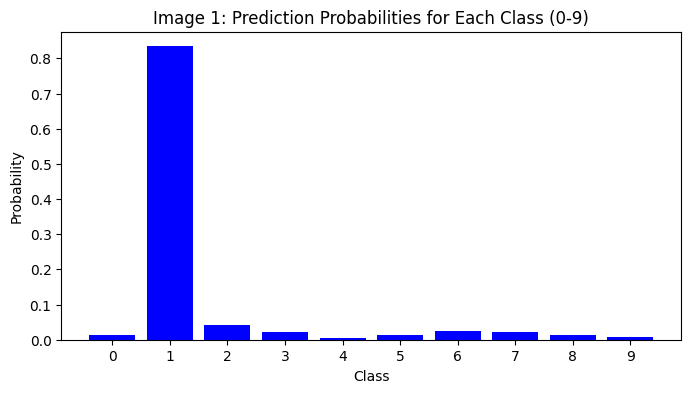

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
이미지 2의 모델 예측 결과: [[0.06174156 0.41649255 0.14558731 0.06024604 0.04210108 0.04930428
  0.14318903 0.03898633 0.02387403 0.01847787]]
이미지 2의 예측된 클래스: 1


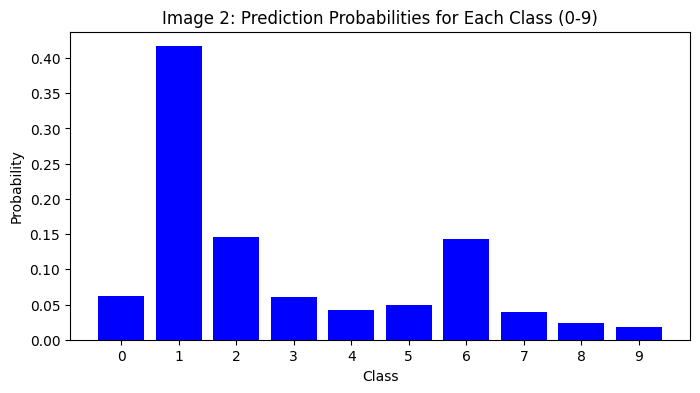

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
이미지 3의 모델 예측 결과: [[0.05936819 0.40341514 0.06004336 0.06715637 0.13094665 0.07577477
  0.05809179 0.06670181 0.0369635  0.04153848]]
이미지 3의 예측된 클래스: 1


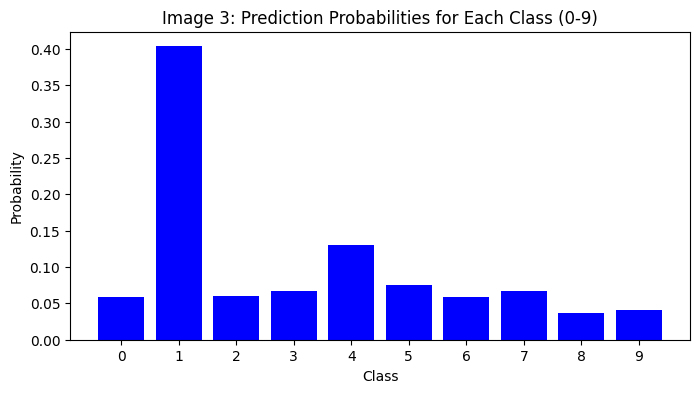

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from PIL import Image, ImageOps

# 모델 로드
model = load_model('my_digit_model.h5')

# 예측할 이미지들의 경로 리스트 (여러 이미지를 넣을 수 있음)
image_paths = ['digit_image1.png', 'digit_image2.PNG', 'digit_image3.PNG']  # 예시 이미지 경로

# 여러 이미지를 처리하고 예측
for i, image_path in enumerate(image_paths):
    # 이미지 로드 및 전처리
    img = Image.open(image_path)

    # 1. 이미지 반전
    img = ImageOps.invert(img.convert('L'))  # 이미지 흑백으로 변환 후 반전

    # 2. 이미지 크기를 28x28로 리사이즈
    img = img.resize((28, 28))

    # 3. 이미지 데이터를 numpy 배열로 변환하고 0~1 사이로 정규화
    img = np.array(img) / 255.0

    # 4. 모델 입력에 맞게 (1, 28, 28, 1) 형태로 차원 추가
    img = np.expand_dims(img, axis=0)  # 배치 차원 추가
    img = np.expand_dims(img, axis=-1)  # 채널 차원 추가 (흑백 이미지)

    # 모델 예측
    prediction = model.predict(img)

    # 예측 결과 출력
    predicted_label = np.argmax(prediction)  # 예측된 클래스
    print(f"이미지 {i+1}의 모델 예측 결과: {prediction}")
    print(f"이미지 {i+1}의 예측된 클래스: {predicted_label}")

    # 시각화
    plt.figure(figsize=(8, 4))
    plt.bar(range(10), prediction[0], color='blue')  # 예측된 확률 값 시각화
    plt.title(f'Image {i+1}: Prediction Probabilities for Each Class (0-9)')
    plt.xlabel('Class')
    plt.ylabel('Probability')
    plt.xticks(range(10))  # x축에 0-9 클래스 표시
    plt.show()